In [75]:
import pandas as pd
import os
import numpy as np

In [76]:
directory = 'Data'

In [77]:
filenames = [os.path.join(directory, f) for f in os.listdir(
    directory) if os.path.isfile(os.path.join(directory, f))]

In [78]:
merged_data_open = pd.DataFrame()
merged_data_close = pd.DataFrame()
merged_data_high = pd.DataFrame()
merged_data_low = pd.DataFrame()
merged_data_volume = pd.DataFrame()

In [79]:

for filename in filenames:
    symbol = filename.split('_')[2]
    symbol = symbol.split('.')[0]
    column_names = [f'{symbol}_open',\
                        f'{symbol}_high',\
                        f'{symbol}_low',\
                        f'{symbol}_close',\
                        f'{symbol}_volume']
    df = pd.read_csv(filename)
    merged_data_open = pd.concat([merged_data_open, df[column_names[0]]], axis=1)
    merged_data_high = pd.concat([merged_data_high, df[column_names[1]]], axis=1)
    merged_data_low = pd.concat([merged_data_low, df[column_names[2]]], axis=1)
    merged_data_close = pd.concat([merged_data_close, df[column_names[3]]], axis=1)
    merged_data_volume = pd.concat([merged_data_volume, df[column_names[4]]], axis=1)


In [80]:
all_dfs = []
all_dfs.append(merged_data_open)
all_dfs.append(merged_data_high)
all_dfs.append(merged_data_low)
all_dfs.append(merged_data_close)
all_dfs.append(merged_data_volume)


In [81]:
for df in all_dfs:
    df.dropna(axis=1,inplace=True)

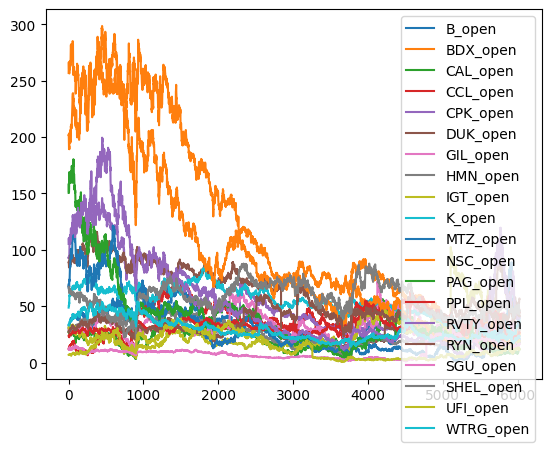

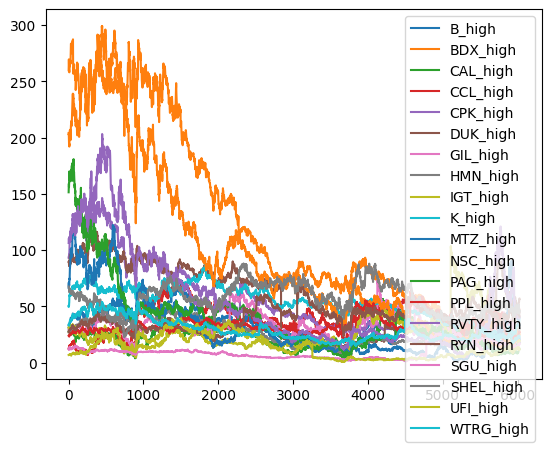

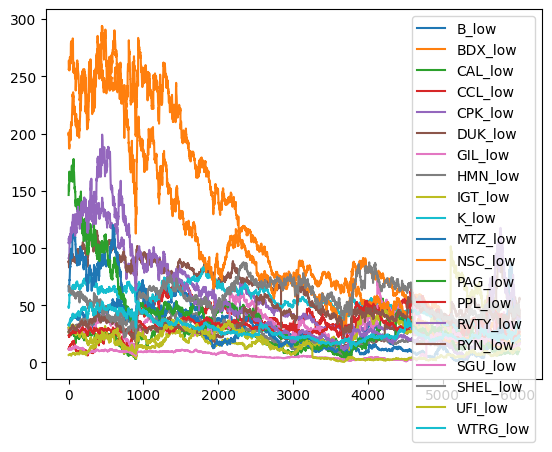

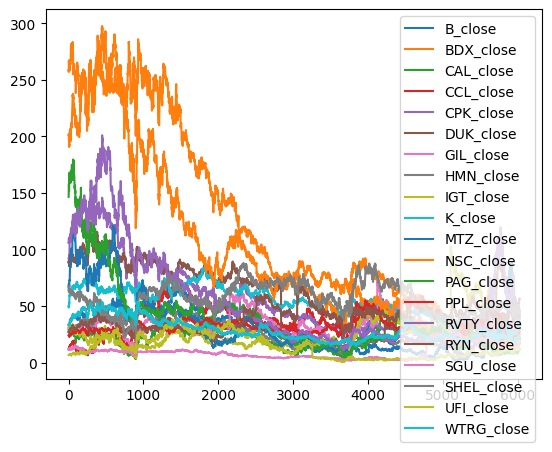

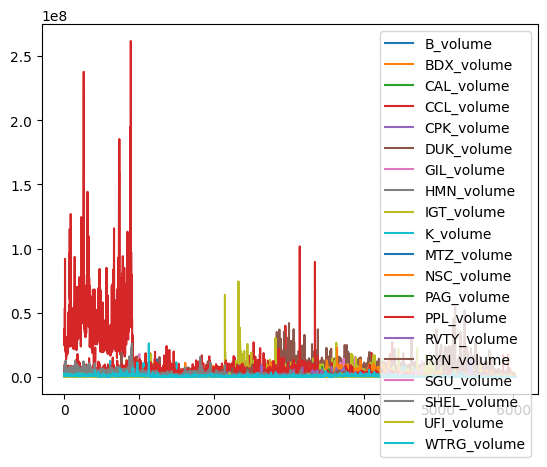

In [82]:
for df in all_dfs:
    df.plot()

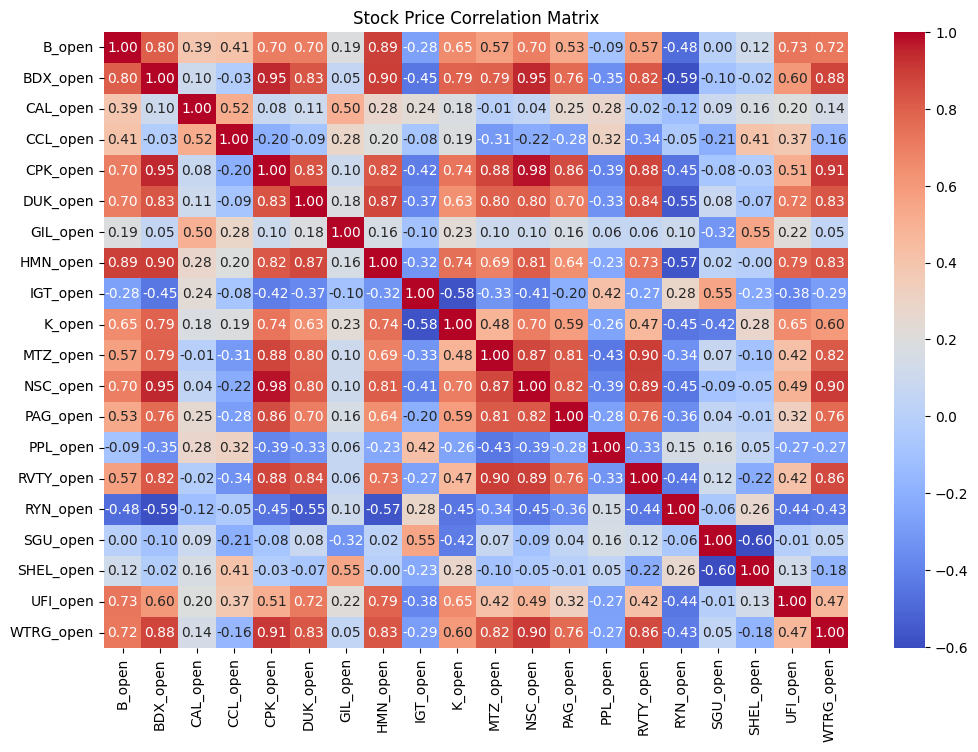

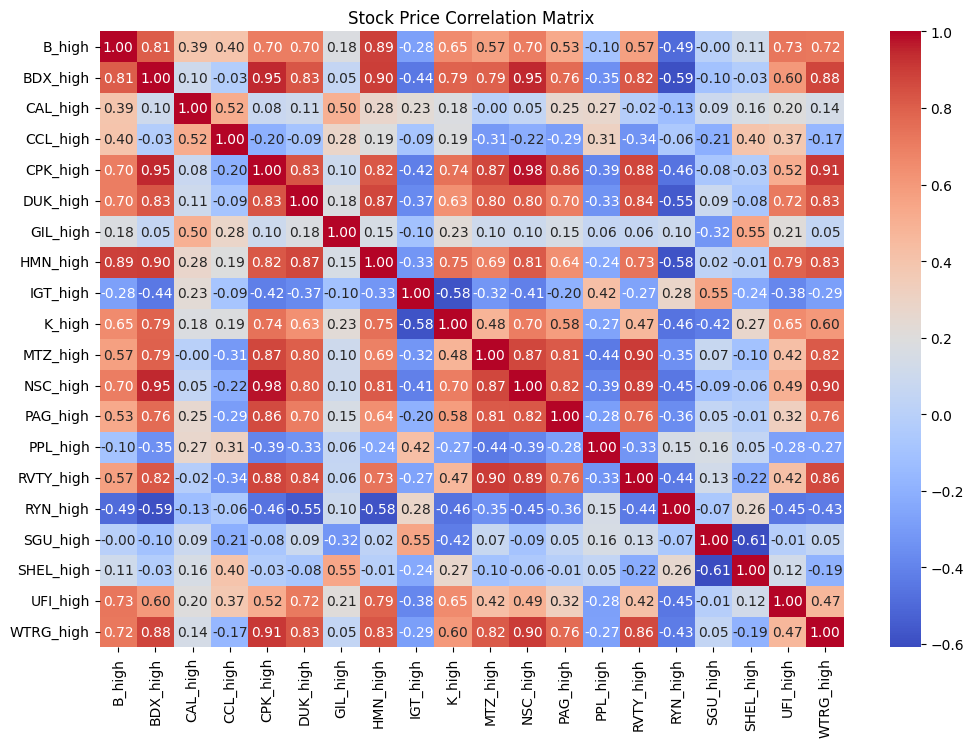

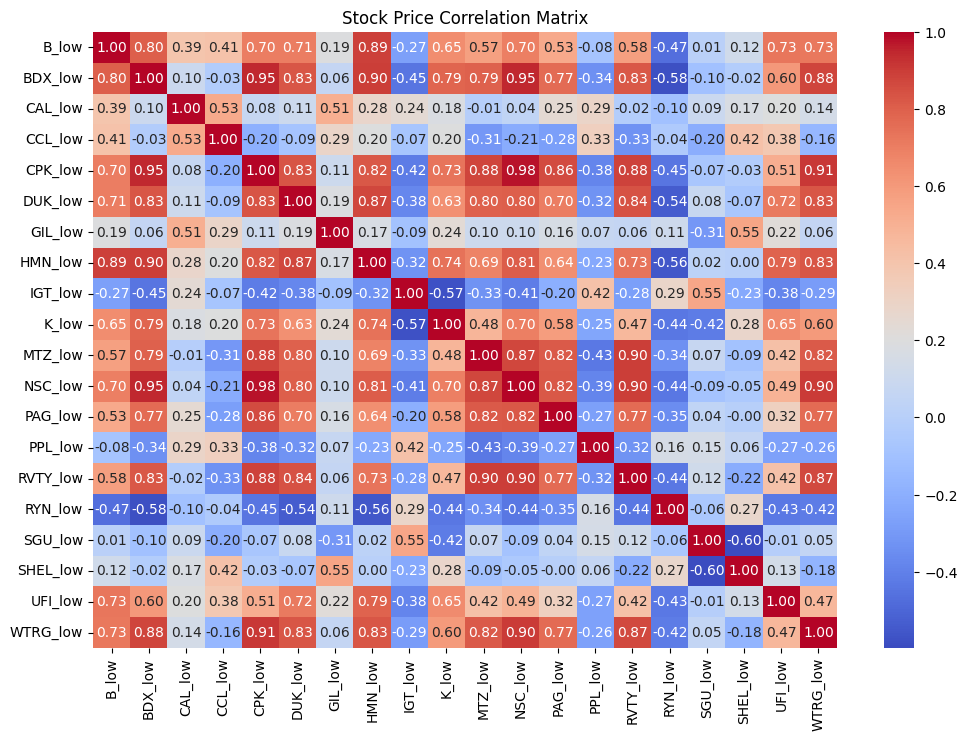

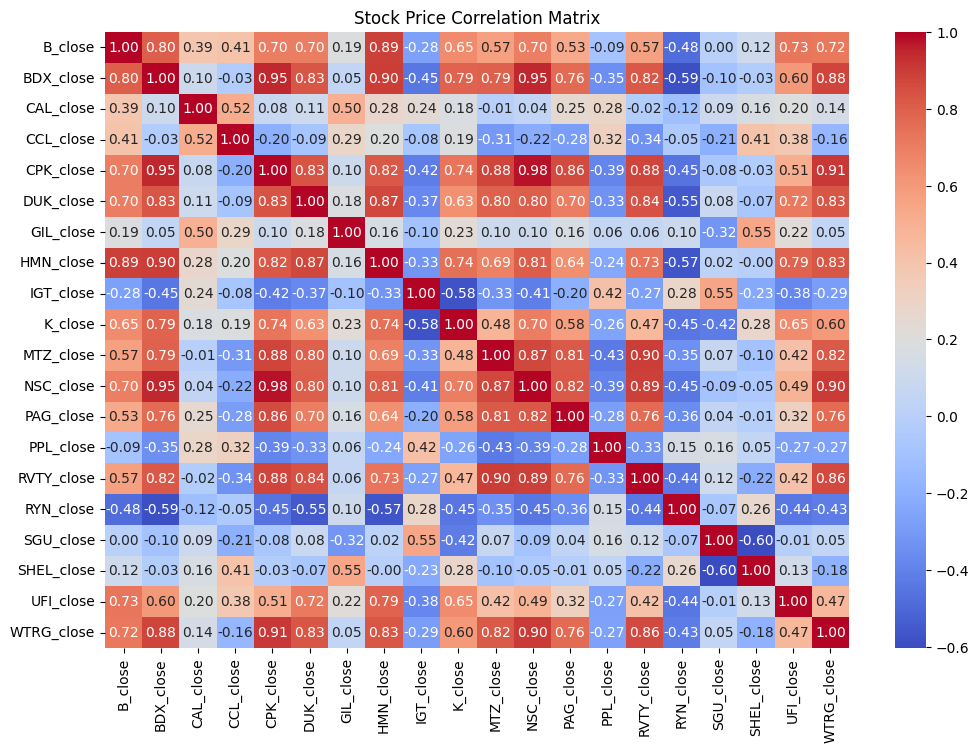

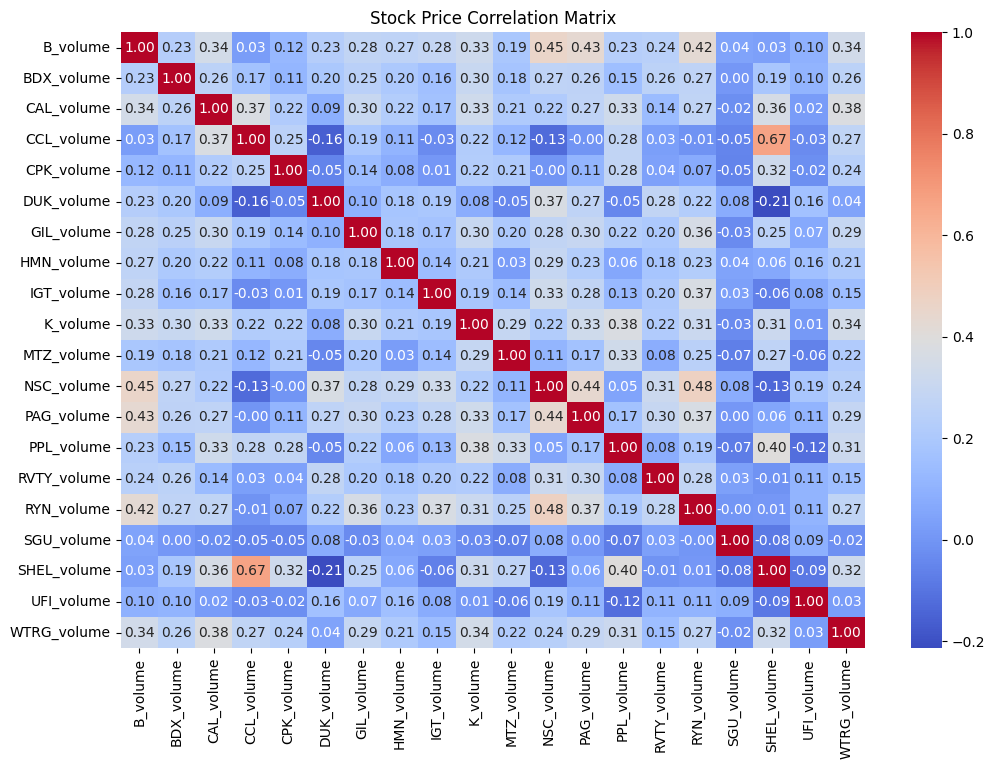

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

for df in all_dfs:
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Stock Price Correlation Matrix")
    plt.show()


In [84]:
all_dfs.pop()

B_volume  BDX_volume  CAL_volume  CCL_volume  CPK_volume  DUK_volume  \
0       190788     1032043      301567    25978345      112851     3277003   
1       158620     1100175      412521    28842136       87720     3172508   
2       109781     1693456      368900    25157690       71310     2658873   
3       167761      987466      501694    26502371      127215     2619522   
4       129737      690136      301064    37982260       90397     3008704   
...        ...         ...         ...         ...         ...         ...   
6022     81900     1815200       20044      944000        6800     1433550   
6023     77500     1564200       10577     1212800        4333     1338900   
6024     31200      664600       24844     1286000        9933     1363350   
6025     23100      970500       16844     1360400        3000     1414650   
6026      4700     1340100        6400     1000500        7133     1172700   

      GIL_volume  HMN_volume  IGT_volume  K_volume  MTZ_volume  NSC_volume  \
0         477106      159598      971130   3339874     1098627      752144   
1         422650      184588      850301   4499296      945359     1062328   
2         511187      118266      631700   2635904     1404809     1109309   
3         421926      188065     1276940   3377133     1235044     1430932   
4         287654      114176      966081   3364275      937582     1143306   
...          ...         ...         ...       ...         ...         ...   
6022       29100       86400      225800    596600       33600      474400   
6023       59700      215500      164100    935000       85467      527800   
6024       21200      181300      405200    653300       62600     1498200   
6025       35900      172200      206800    580300       74867      604800   
6026        8100      193500      224600    834700       71200      762000   

      PAG_volume  PPL_volume  RVTY_volume  RYN_volume  SGU_volume  \
0         344179     4728655       556903      362565       20316   
1         334988     6906028       747339      381743       32102   
2         159724     4608324       356311      281761       50719   
3         247903     6896984       595196      347275       12473   
4         165809     5399485       520522      339493       21465   
...          ...         ...          ...         ...         ...   
6022       52800      114400       114600       94074       32600   
6023       14300      374600       103700      123704       21300   
6024       16200      287400       242500      101096       68000   
6025       15100      283600       219000      135319       45100   
6026       20200      168000        95300      185926       62800   

      SHEL_volume  UFI_volume  WTRG_volume  
0         8064370       30789      1070793  
1         5893114      101820      1055135  
2         6390396       28437       779924  
3         5700124       40281      1477868  
4         7330905       40274       716412  
...           ...         ...          ...  
6022       392500      217500        23040  
6023       302300      172500        31642  
6024       255800      265500        40305  
6025       234300       90000        28785  
6026       233200      224700        26726  

[6027 rows x 20 columns]

In [85]:
masks = []
for df in all_dfs:
    correlation_matrix = df.corr()
    mask = correlation_matrix >= 0.7
    mask &= correlation_matrix<1.0
    mask.columns = [i.split('_')[0] for i in mask.columns]
    mask.index = [i.split('_')[0] for i in mask.columns]
    masks.append(mask)
common_mask = masks[0] & masks[1] & masks[2] & masks[3]


In [86]:
distance_matrix = np.where(common_mask, 0, 1)
distance_matrix

array([[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 0, 1,

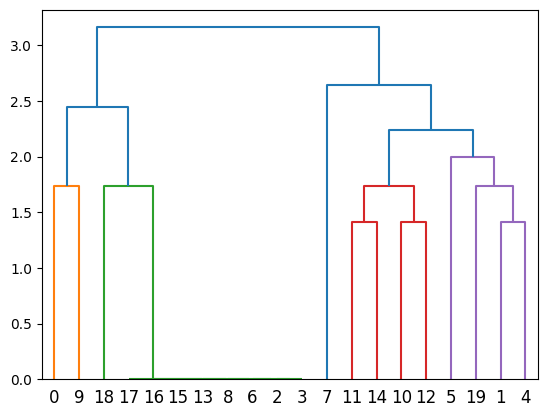

In [87]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram to visualize the clusters
dendrogram(linkage_matrix)
plt.show()


In [88]:
from scipy.cluster.hierarchy import fcluster

# Set a threshold height to determine the number of clusters
threshold = 3

# Get cluster assignments
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

print("Cluster assignments:", clusters)


Cluster assignments: [1 2 1 1 2 2 1 2 1 1 2 2 2 1 2 1 1 1 1 2]


In [89]:
import pandas as pd
import networkx as nx

# Create a DataFrame from the data
df = pd.DataFrame(distance_matrix)
df.columns = common_mask.columns
# Create an empty graph
G = nx.Graph()

# Add nodes (people) to the graph
G.add_nodes_from(df.columns)

# Iterate through the DataFrame to add edges (friendships)
for person1 in df.columns:
    for person2 in df.columns:
        if person1 != person2 and df[person1].equals(df[person2]):
            G.add_edge(person1, person2)

# Find the largest clique in the graph
cliques = list(nx.find_cliques(G))
largest_clique = max(cliques, key=len)

print("The largest group of friends where everyone is friends with each other:")
print(largest_clique)


The largest group of friends where everyone is friends with each other:
['GIL', 'SHEL', 'CAL', 'RYN', 'IGT', 'SGU', 'CCL', 'PPL']


In [90]:
G = nx.Graph()

# Add nodes (people) to the graph
G.add_nodes_from(df.columns)
for column in df.columns:
    for i, val in enumerate(df[column]):
        if val==1:
            G.add_edge(df.columns[i], column)
cliques = list(nx.find_cliques(G))
largest_clique = max(cliques, key=len)
print(largest_clique)


['GIL', 'CAL', 'SHEL', 'CCL', 'PPL', 'RYN', 'IGT', 'SGU', 'B', 'K', 'PAG']


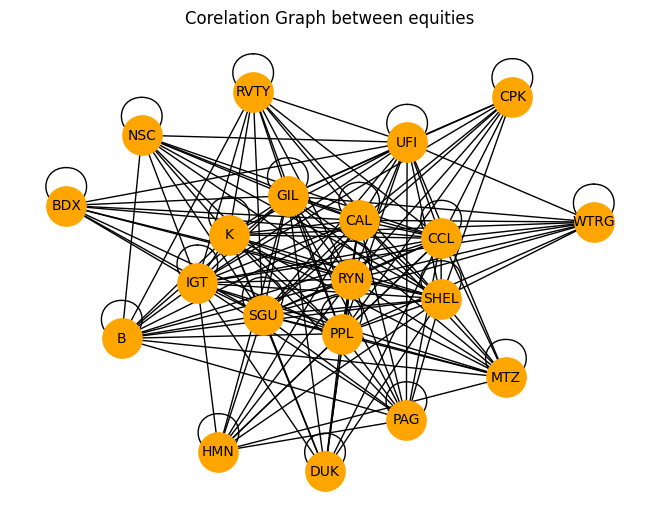

In [91]:
pos = nx.spring_layout(G)  # Layout algorithm

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, cmap=plt.cm.rainbow, node_color='orange',
        node_size=800, font_size=10)
plt.title("Corelation Graph between equities")
plt.show()



In [155]:
processed_dfs=[]
for df in all_dfs:
    modified_symbols = [i+'_'+df.columns[0].split('_')[1] for i in largest_clique]
    df1 = df[modified_symbols]
    processed_dfs.append(df1)

In [156]:
processed_dfs[0].head(1)

GIL_open  CAL_open  SHEL_open  CCL_open  PPL_open  RYN_open  IGT_open  \
0     28.86     27.38      67.14     12.38     23.86      27.0      30.8   

   SGU_open  B_open  K_open  PAG_open  
0     11.61   32.71   48.71    150.57

In [157]:
import pandas as pd
import numpy as np
import pandas_ta as ta
pro_processed_dfs=[]
for df1 in processed_dfs:
    df=df1.copy()
    for col in df.columns:
        df[f'{col}_Momentum'] = df[col] - df[col].shift(1)

    window = 20
    for col in df1.columns:
        df[f'{col}_MA'] = df[col].rolling(window).mean()
        df[f'{col}_Upper_Band'] = df[f'{col}_MA'] + \
            2 * df[col].rolling(window).std()
        df[f'{col}_Lower_Band'] = df[f'{col}_MA'] - \
            2 * df[col].rolling(window).std()
    for col in df1.columns:
        df.ta.macd(close=col, fast=12, slow=26, append=True)
        df.rename(columns={'MACD_12_26_9': f'{col}_MACD', 'MACDh_12_26_9': f'{col}_MACDh',
                  'MACDs_12_26_9': f'{col}_MACDs'}, inplace=True)
    short_window = 12 
    long_window = 26
    for col in df1.columns:
        ema12 = df[col].ewm(span=short_window).mean()
        ema26 = df[col].ewm(span=long_window).mean()
        df[f'{col}_EMA12'] = ema12
        df[f'{col}_EMA26'] = ema26



    df.dropna(inplace=True)
    df = df.sort_index(axis=1)
    df = df.reset_index(drop=True)
    pro_processed_dfs.append(df)

In [158]:
df

B_close  B_close_EMA12  B_close_EMA26  B_close_Lower_Band  B_close_MA  \
0       38.62      37.790195      36.789024           33.764928     36.7915   
1       38.31      37.870397      36.909862           34.095202     36.9840   
2       38.33      37.941278      37.022085           34.557915     37.1900   
3       38.68      38.055163      37.152453           34.865481     37.3720   
4       38.42      38.111391      37.251673           35.096121     37.5095   
...       ...            ...            ...                 ...         ...   
5989    20.75      19.374452      18.233028           14.553800     18.0695   
5990    21.75      19.739921      18.493544           14.642784     18.3630   
5991    20.50      19.856856      18.642171           15.094050     18.6255   
5992    21.19      20.061955      18.830899           15.362130     18.8755   
5993    20.31      20.100116      18.940462           15.738999     19.0785   

      B_close_MACD  B_close_MACDh  B_close_MACDs  B_close_Momentum  \
0         1.481686       0.083676       1.398010              0.06   
1         1.414989       0.013583       1.401406             -0.31   
2         1.348204      -0.042561       1.390766              0.02   
3         1.308436      -0.065864       1.374300              0.35   
4         1.241627      -0.106138       1.347765             -0.26   
...            ...            ...            ...               ...   
5989      1.141424       0.281478       0.859946              0.50   
5990      1.246377       0.309145       0.937232              1.00   
5991      1.214686       0.221963       0.992723             -1.25   
5992      1.231056       0.190667       1.040390              0.69   
5993      1.159654       0.095412       1.064242             -0.88   

      B_close_Upper_Band  ...  SHEL_close  SHEL_close_EMA12  SHEL_close_EMA26  \
0              39.818072  ...       61.42         62.780456         63.418658   
1              39.872798  ...       61.03         62.510375         63.228885   
2              39.822085  ...       60.46         62.194159         63.010080   
3              39.878519  ...       60.73         61.968437         62.830789   
4              39.922879  ...       60.93         61.808398         62.682001   
...                  ...  ...         ...               ...               ...   
5989           21.585200  ...       42.25         46.210602         46.777861   
5990           22.083216  ...       43.13         45.736663         46.507649   
5991           22.156950  ...       45.44         45.691022         46.428564   
5992           22.388870  ...       45.75         45.700096         46.378300   
5993           22.418001  ...       45.63         45.689312         46.322871   

      SHEL_close_Lower_Band  SHEL_close_MA  SHEL_close_MACD  SHEL_close_MACDh  \
0                 61.291504        63.6805        -0.825682         -0.223414   
1                 60.884872        63.4965        -0.905491         -0.242578   
2                 60.400807        63.2935        -1.003169         -0.272206   
3                 60.054421        63.1070        -1.046728         -0.252611   
4                 59.833253        62.9070        -1.052972         -0.207084   
...                     ...            ...              ...               ...   
5989              42.903302        47.1065        -0.567260         -0.618101   
5990              42.457002        46.9815        -0.770986         -0.657462   
5991              42.524168        47.0065        -0.737542         -0.499214   
5992              42.470924        46.9785        -0.678204         -0.351901   
5993              42.470924        46.9785        -0.633559         -0.245804   

      SHEL_close_MACDs  SHEL_close_Momentum  SHEL_close_Upper_Band  
0            -0.602268                -0.59              66.069496  
1            -0.662913                -0.39              66.108128  
2            -0.730964                -0.57              66.186

In [159]:
df.columns[:11]

Index(['B_close', 'B_close_EMA12', 'B_close_EMA26', 'B_close_Lower_Band',
       'B_close_MA', 'B_close_MACD', 'B_close_MACDh', 'B_close_MACDs',
       'B_close_Momentum', 'B_close_Upper_Band', 'CAL_close'],
      dtype='object')

In [160]:
df

B_close  B_close_EMA12  B_close_EMA26  B_close_Lower_Band  B_close_MA  \
0       38.62      37.790195      36.789024           33.764928     36.7915   
1       38.31      37.870397      36.909862           34.095202     36.9840   
2       38.33      37.941278      37.022085           34.557915     37.1900   
3       38.68      38.055163      37.152453           34.865481     37.3720   
4       38.42      38.111391      37.251673           35.096121     37.5095   
...       ...            ...            ...                 ...         ...   
5989    20.75      19.374452      18.233028           14.553800     18.0695   
5990    21.75      19.739921      18.493544           14.642784     18.3630   
5991    20.50      19.856856      18.642171           15.094050     18.6255   
5992    21.19      20.061955      18.830899           15.362130     18.8755   
5993    20.31      20.100116      18.940462           15.738999     19.0785   

      B_close_MACD  B_close_MACDh  B_close_MACDs  B_close_Momentum  \
0         1.481686       0.083676       1.398010              0.06   
1         1.414989       0.013583       1.401406             -0.31   
2         1.348204      -0.042561       1.390766              0.02   
3         1.308436      -0.065864       1.374300              0.35   
4         1.241627      -0.106138       1.347765             -0.26   
...            ...            ...            ...               ...   
5989      1.141424       0.281478       0.859946              0.50   
5990      1.246377       0.309145       0.937232              1.00   
5991      1.214686       0.221963       0.992723             -1.25   
5992      1.231056       0.190667       1.040390              0.69   
5993      1.159654       0.095412       1.064242             -0.88   

      B_close_Upper_Band  ...  SHEL_close  SHEL_close_EMA12  SHEL_close_EMA26  \
0              39.818072  ...       61.42         62.780456         63.418658   
1              39.872798  ...       61.03         62.510375         63.228885   
2              39.822085  ...       60.46         62.194159         63.010080   
3              39.878519  ...       60.73         61.968437         62.830789   
4              39.922879  ...       60.93         61.808398         62.682001   
...                  ...  ...         ...               ...               ...   
5989           21.585200  ...       42.25         46.210602         46.777861   
5990           22.083216  ...       43.13         45.736663         46.507649   
5991           22.156950  ...       45.44         45.691022         46.428564   
5992           22.388870  ...       45.75         45.700096         46.378300   
5993           22.418001  ...       45.63         45.689312         46.322871   

      SHEL_close_Lower_Band  SHEL_close_MA  SHEL_close_MACD  SHEL_close_MACDh  \
0                 61.291504        63.6805        -0.825682         -0.223414   
1                 60.884872        63.4965        -0.905491         -0.242578   
2                 60.400807        63.2935        -1.003169         -0.272206   
3                 60.054421        63.1070        -1.046728         -0.252611   
4                 59.833253        62.9070        -1.052972         -0.207084   
...                     ...            ...              ...               ...   
5989              42.903302        47.1065        -0.567260         -0.618101   
5990              42.457002        46.9815        -0.770986         -0.657462   
5991              42.524168        47.0065        -0.737542         -0.499214   
5992              42.470924        46.9785        -0.678204         -0.351901   
5993              42.470924        46.9785        -0.633559         -0.245804   

      SHEL_close_MACDs  SHEL_close_Momentum  SHEL_close_Upper_Band  
0            -0.602268                -0.59              66.069496  
1            -0.662913                -0.39              66.108128  
2            -0.730964                -0.57              66.186

<AxesSubplot:>

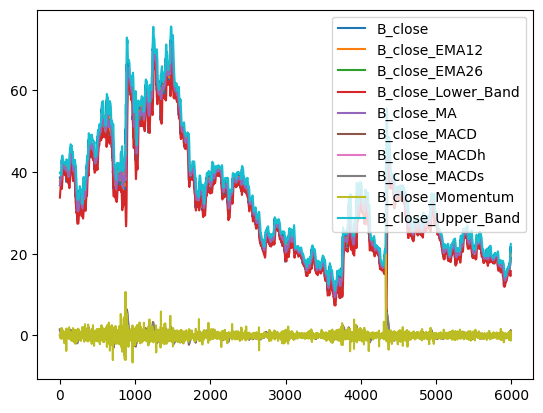

In [163]:
df[df.columns[:10]].plot()


<AxesSubplot:>

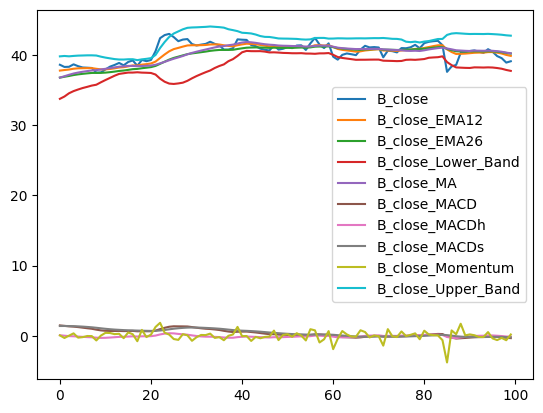

In [164]:
df[df.columns[:10]][:100].plot()


FOR PCA 


In [136]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


Preparing Data:

Ensuring that DataFrame contains only numerical data.
Ensuring that data is standardized (mean = 0, variance = 1 for each variable)

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_scaled_df = []
for df in pro_processed_dfs:
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    all_scaled_df.append(scaled_df)

Calculating the Covariance Matrix
plotting it and sorting it

Explained Variance Ratios: [0.17324647 0.11772222]


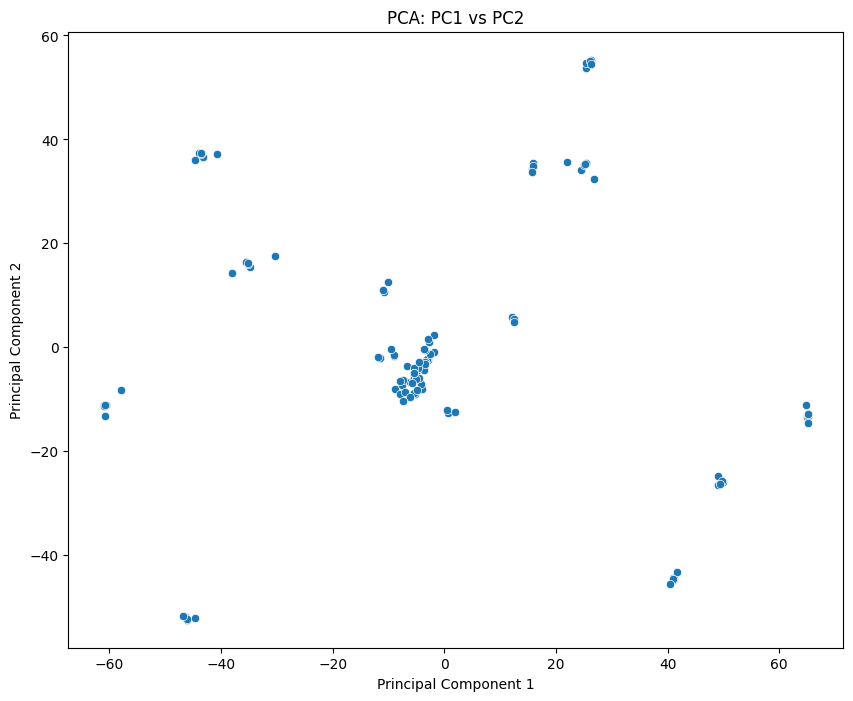

Explained Variance Ratios: [0.17346293 0.11783649]


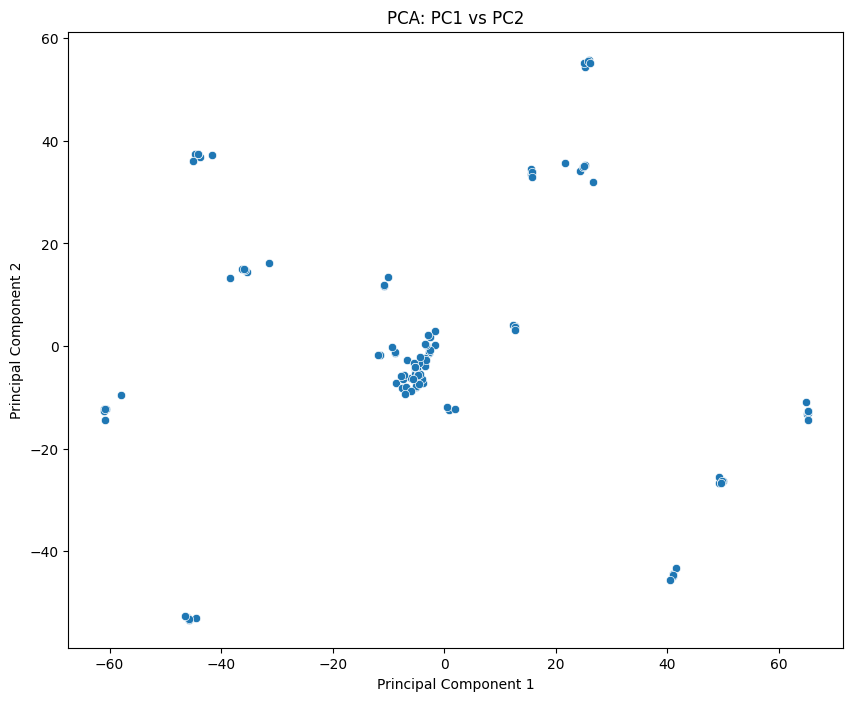

Explained Variance Ratios: [0.17252614 0.11787661]


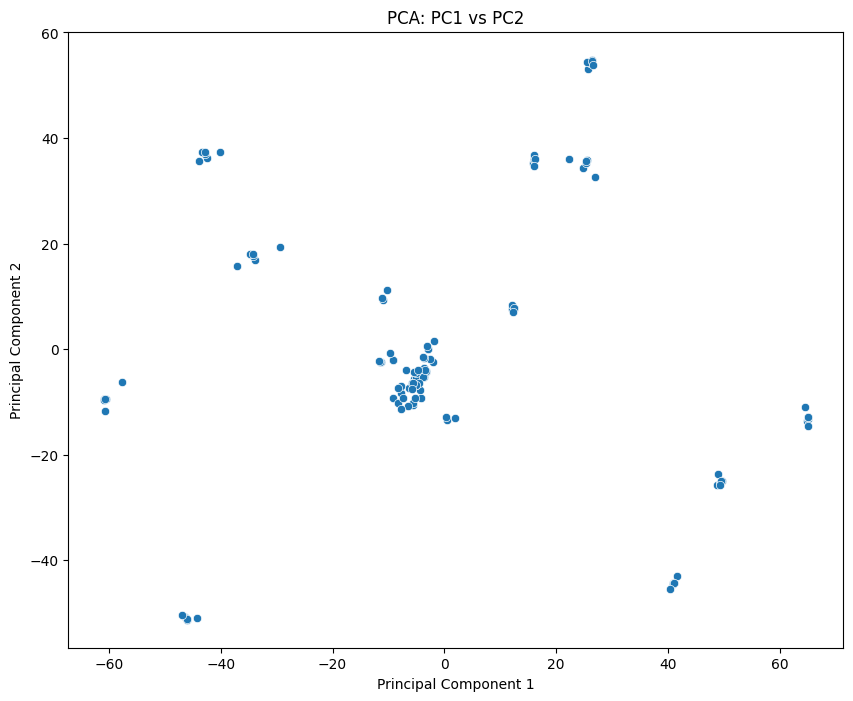

Explained Variance Ratios: [0.17308646 0.11786875]


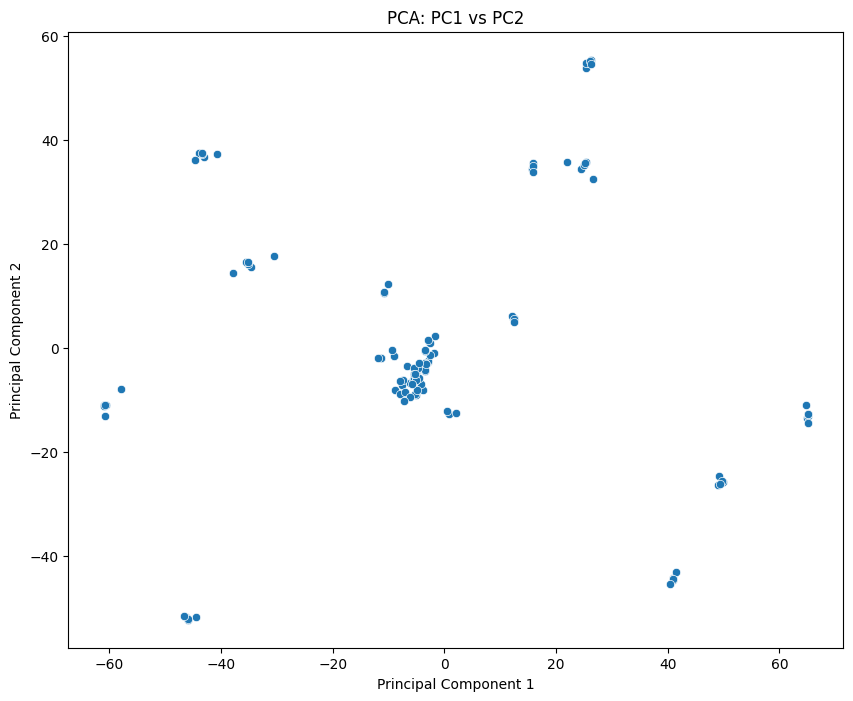

In [170]:
for df in all_scaled_df:
    n_components = 2  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])
    
    # Plot the first two principal components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)
    plt.title('PCA: PC1 vs PC2')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    

In [171]:
pca_df


PC1        PC2
0    48.969600 -26.361108
1    49.486597 -25.971080
2    49.858217 -25.793971
3    49.128668 -24.646576
4    49.687888 -25.671683
..         ...        ...
116  -5.338203  -5.168904
117  -7.300377 -10.299121
118  -4.491744  -2.940713
119  -5.764234  -6.972546
120  26.336235  54.565600

[121 rows x 2 columns]

Explained Variance Ratios: [0.17324647 0.11772222 0.09680311]


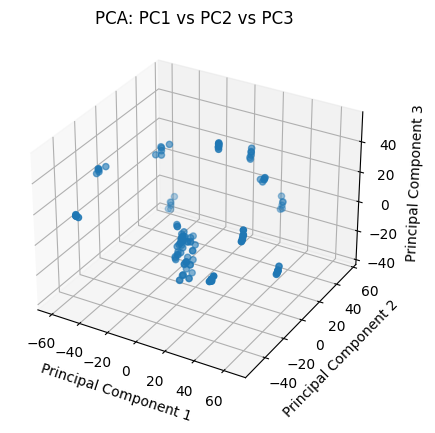

Explained Variance Ratios: [0.17346293 0.11783649 0.09558534]


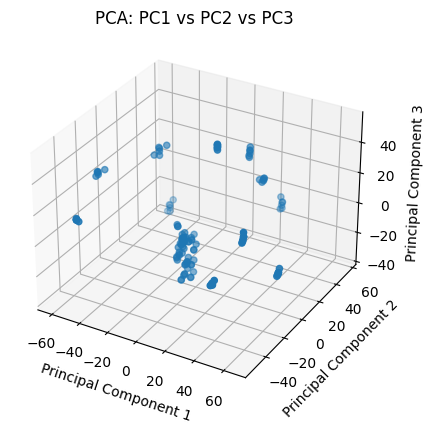

Explained Variance Ratios: [0.17252614 0.11787661 0.09827432]


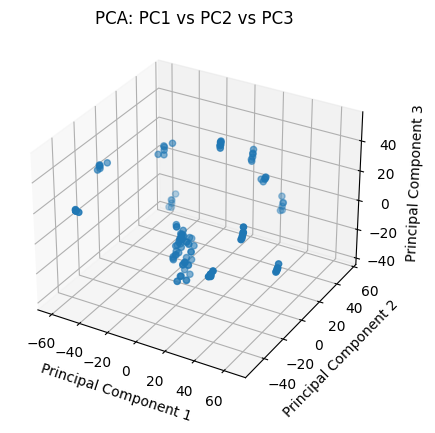

Explained Variance Ratios: [0.17308646 0.11786875 0.09690783]


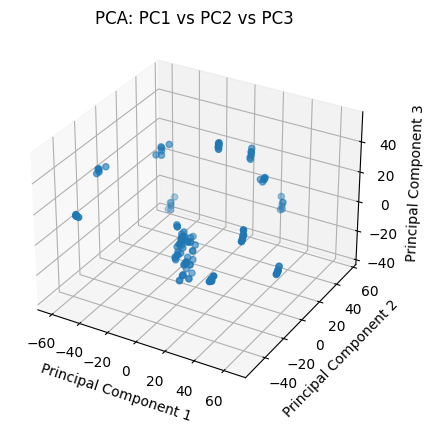

In [172]:
for df in all_scaled_df:
    n_components = 3  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])

    # Visualize in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('PCA: PC1 vs PC2 vs PC3')
    plt.show()


Explained Variance Ratios: [0.17324647 0.11772222 0.09680311 0.06624822]


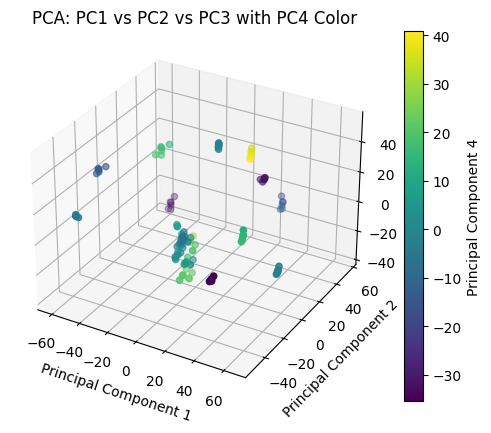

Explained Variance Ratios: [0.17346293 0.11783649 0.09558534 0.06597559]


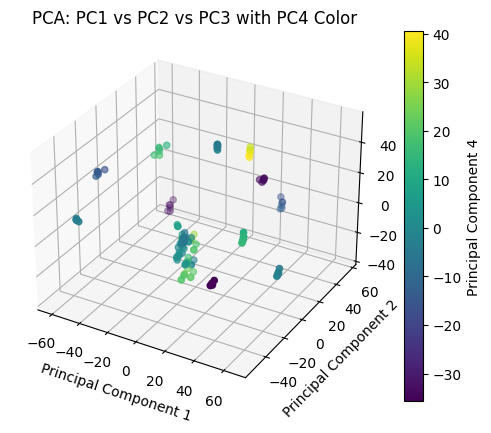

Explained Variance Ratios: [0.17252614 0.11787661 0.09827432 0.06654396]


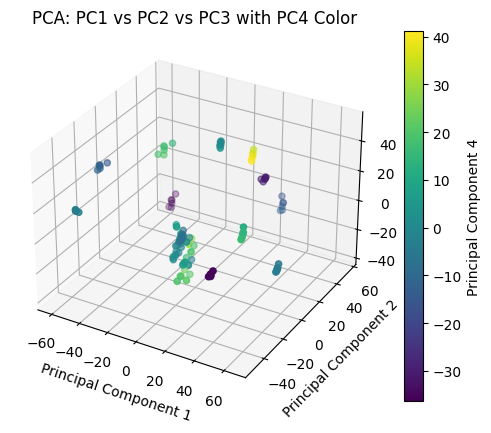

Explained Variance Ratios: [0.17308646 0.11786875 0.09690783 0.06626277]


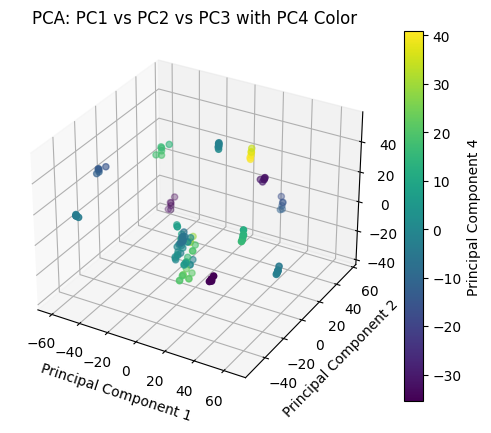

In [177]:
for df in all_scaled_df:
    n_components = 4  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'],
                         pca_df['PC3'], c=pca_df['PC4'], cmap='viridis')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('PCA: PC1 vs PC2 vs PC3 with PC4 Color')
    plt.colorbar(scatter, label='Principal Component 4')
    plt.show()


In [178]:
pca_df

PC1        PC2        PC3        PC4
0    48.969599 -26.361114  17.044024  16.336817
1    49.486597 -25.971083  19.226617  15.320767
2    49.858217 -25.793973  21.292733  13.837270
3    49.128669 -24.646575  23.538608  12.142374
4    49.687888 -25.671684  20.885197  14.162301
..         ...        ...        ...        ...
116  -5.338216  -5.168956 -33.362069  23.417223
117  -7.300382 -10.299165 -19.408571   2.270602
118  -4.491756  -2.940754 -30.224790  22.944034
119  -5.764237  -6.972531 -10.340994  -6.101532
120  26.336229  54.565560 -13.282397 -12.271190

[121 rows x 4 columns]

Explained Variance Ratios: [0.17324647 0.11772222 0.09680311 0.06624822 0.04580067 0.03758852
 0.03517543 0.02869011 0.02798322 0.02556801 0.02464987 0.02417748
 0.02052527 0.01974875 0.0191321  0.01793896 0.01574721 0.01464261
 0.01343925 0.01243698 0.01097574 0.01034361 0.01009626 0.00913806
 0.00877214 0.00872566 0.00837904 0.0076902  0.00739343 0.00738648
 0.00701494 0.00691801 0.00662822 0.00639612 0.00616044 0.00581174
 0.00564943 0.00539875 0.00511344 0.00472765]


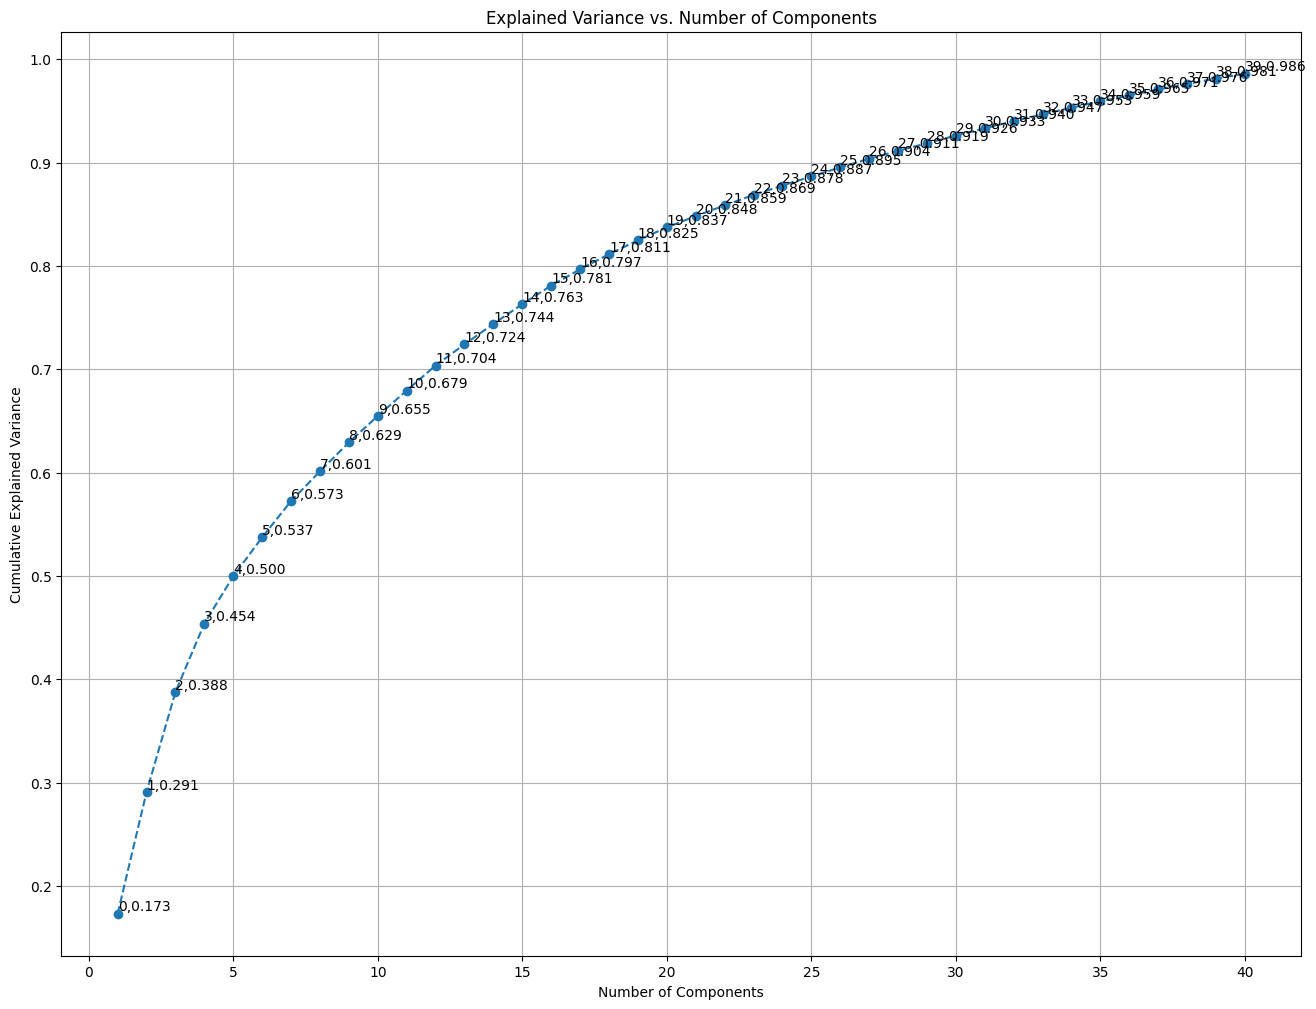

Explained Variance Ratios: [0.17346293 0.11783649 0.09558534 0.06597559 0.04522483 0.03673374
 0.03507749 0.02883592 0.02784273 0.02584296 0.02474528 0.02381768
 0.0203914  0.01967691 0.01850837 0.01789077 0.01596776 0.01457939
 0.01354117 0.01258139 0.01110123 0.0103236  0.01005851 0.00925353
 0.00903642 0.00888232 0.00865082 0.00791202 0.00768059 0.00750366
 0.00727975 0.00720082 0.00662929 0.00648281 0.0064316  0.00590431
 0.00575049 0.00546187 0.0052058  0.00487608]


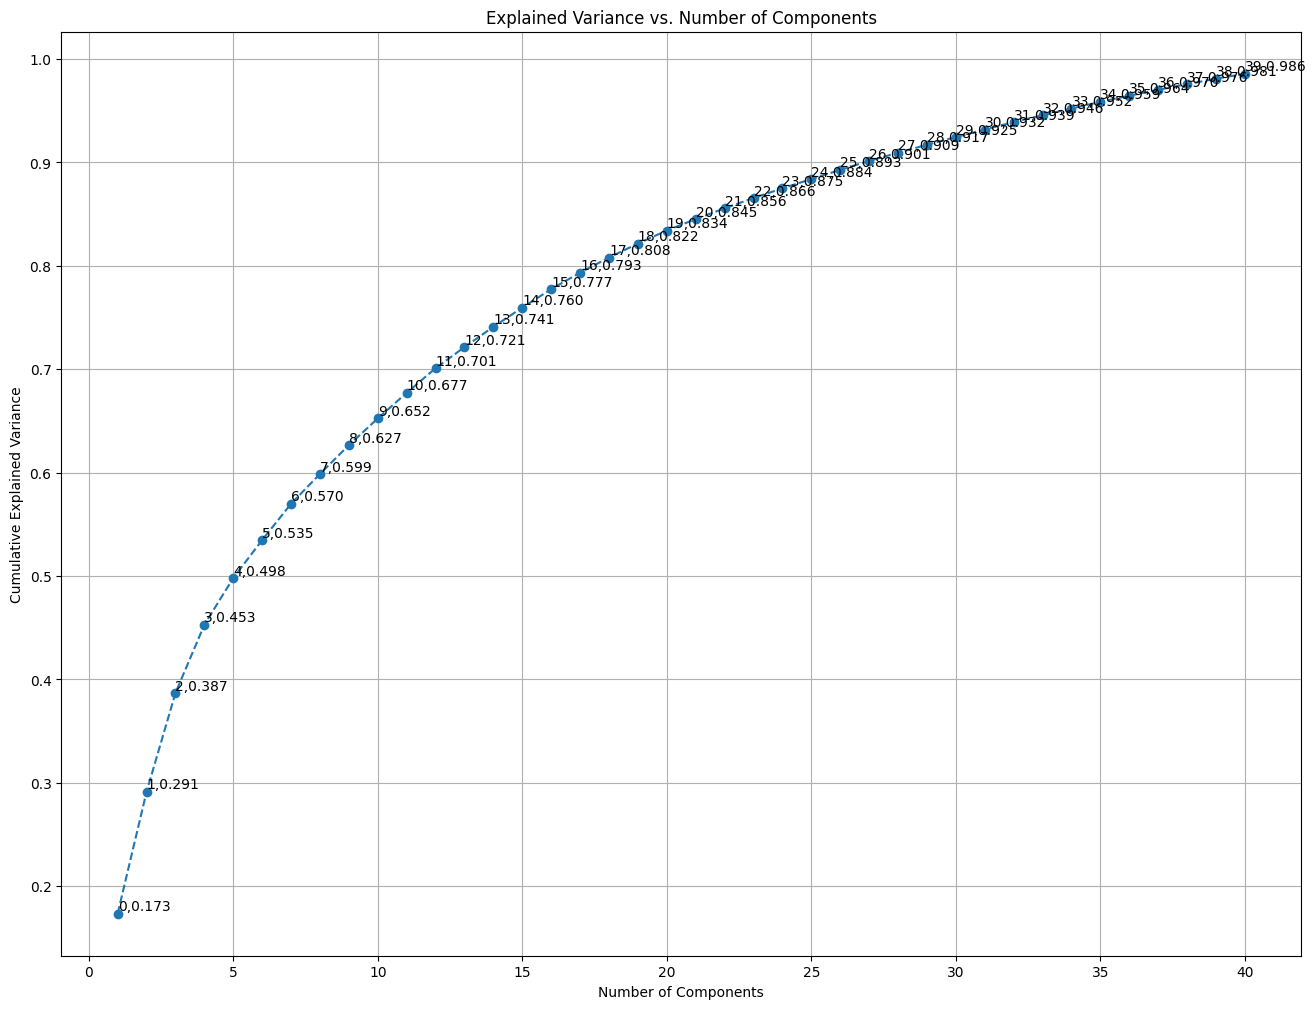

Explained Variance Ratios: [0.17252614 0.11787661 0.09827432 0.06654396 0.04612401 0.0384061
 0.03517141 0.028511   0.02801665 0.0251869  0.02448576 0.02422364
 0.02039773 0.01961123 0.01900575 0.01783866 0.01558578 0.01468499
 0.01340194 0.01226433 0.01092095 0.01024528 0.01002971 0.00910549
 0.00873304 0.00866564 0.00827921 0.00768246 0.0075827  0.00724589
 0.00705906 0.0069019  0.0066467  0.00632745 0.00618651 0.00572316
 0.0055779  0.00529691 0.00509274 0.00469429]


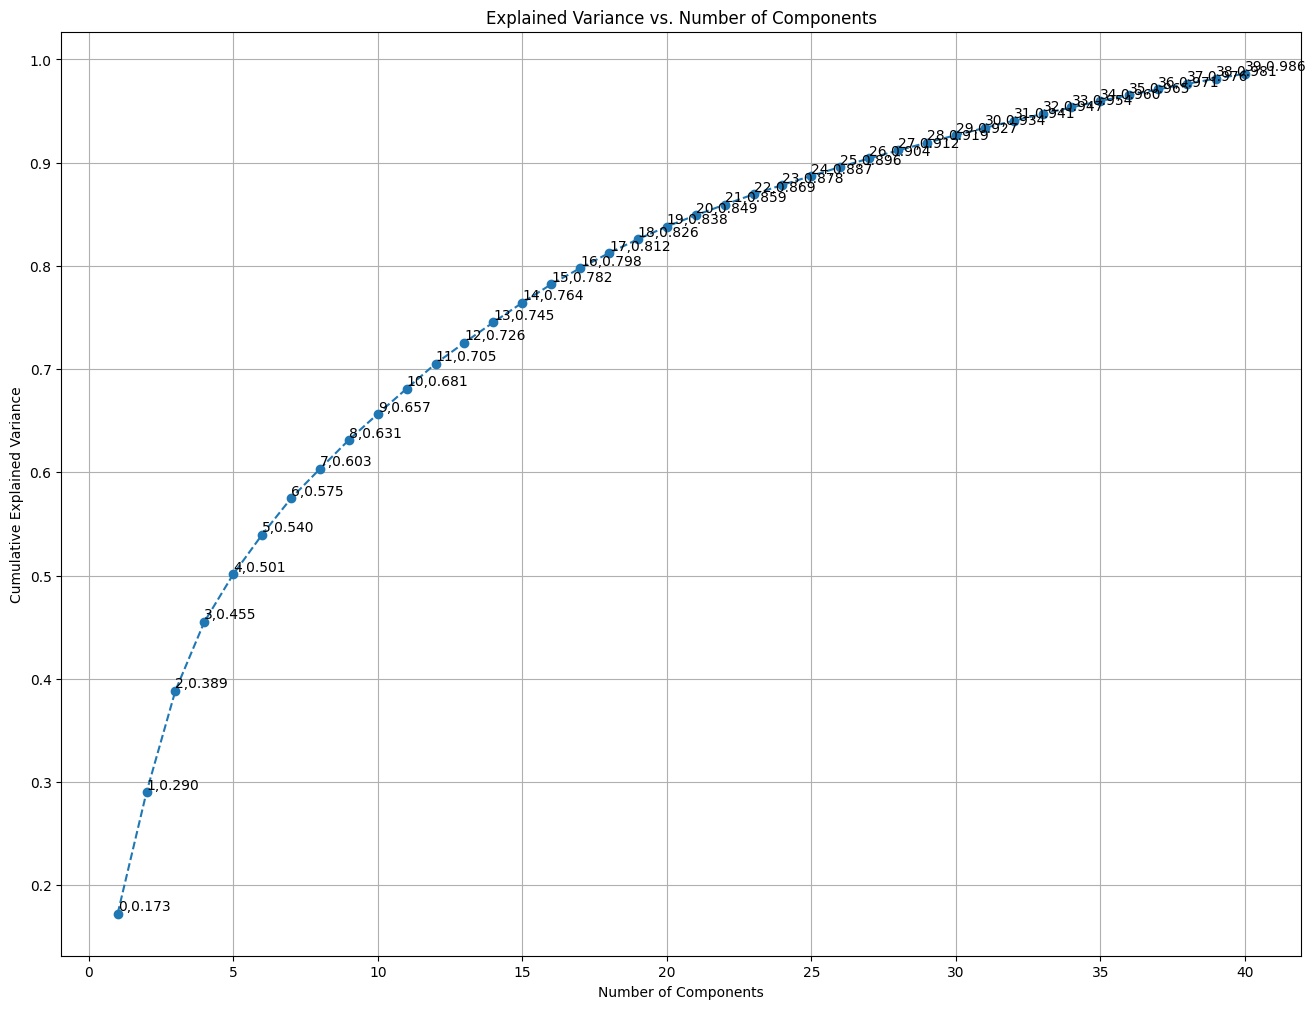

Explained Variance Ratios: [0.17308646 0.11786875 0.09690783 0.06626277 0.04594994 0.03787891
 0.03513285 0.02877511 0.02788547 0.025497   0.0246519  0.02424873
 0.0207996  0.01986475 0.0192975  0.01800214 0.01583225 0.01462163
 0.01347186 0.01249021 0.01101798 0.01028997 0.01009946 0.00908107
 0.00884972 0.00872691 0.00828333 0.00760882 0.00740604 0.0072128
 0.00690533 0.00688924 0.00669487 0.00629184 0.00610657 0.00569419
 0.005497   0.00522036 0.00498241 0.00464018]


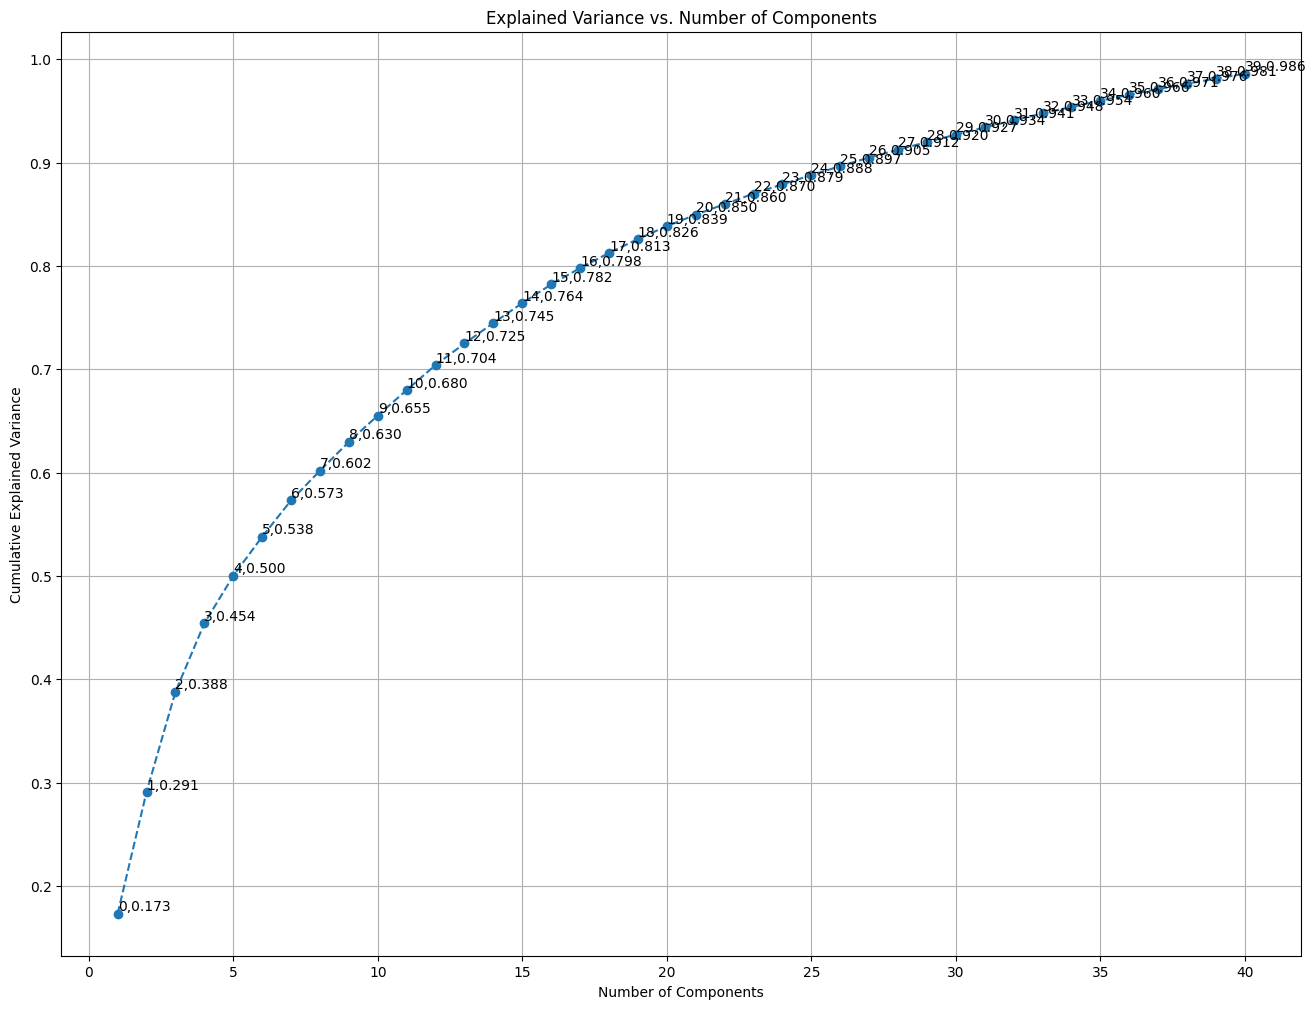

In [179]:
for df in all_scaled_df:
    n_components = 40  # You can change this to 3 for 3D visualization

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.T)
    explained_variance = pca.explained_variance_ratio_
    print("Explained Variance Ratios:", explained_variance)
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=pca_result, columns=[
                          f'PC{i}' for i in range(1, n_components + 1)])
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(16, 12))
    plt.plot(range(1, len(cumulative_variance) + 1),
             cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    # plt.ylim(0.9, 1.01)
    for i, var in enumerate(cumulative_variance):
        # if i <6:
        #     continue
        plt.text(i + 1, var, f'{i},{var:.3f}', ha='left', va='bottom')


    plt.grid()
    plt.show()


In [180]:
pca_df


PC1        PC2        PC3        PC4        PC5        PC6  \
0    48.969599 -26.361112  17.043976  16.337743  -0.692193   2.726688   
1    49.486597 -25.971081  19.226571  15.321593  -1.011182   4.762019   
2    49.858216 -25.793971  21.292688  13.838042  -3.129382   4.728371   
3    49.128668 -24.646573  23.538568  12.142965  -3.050786   6.382346   
4    49.687888 -25.671682  20.885155  14.163048  -2.183039   5.505406   
..         ...        ...        ...        ...        ...        ...   
116  -5.338215  -5.168949 -33.362067  23.415247  17.134853   7.180736   
117  -7.300382 -10.299163 -19.408610   2.270676 -10.612360 -25.133184   
118  -4.491755  -2.940748 -30.224775  22.941832  19.763298  15.661241   
119  -5.764237  -6.972533 -10.340931  -6.101964 -23.353097 -24.094316   
120  26.336230  54.565562 -13.282429 -12.272233  -2.830914   7.710352   

           PC7        PC8        PC9       PC10  ...      PC31       PC32  \
0   -13.029342   0.535929   9.968156 -12.497148  ...  1.721010   1.969321   
1   -13.659238  -0.367917  11.908334 -11.897236  ...  2.563416   2.599813   
2   -13.625119  -1.713312  12.714109 -11.270116  ...  2.755487   2.464399   
3   -15.746997  -2.617073  13.989341 -10.939703  ...  2.420876   2.533822   
4   -13.979709  -1.468873  13.172944 -11.378147  ...  2.867387   2.821004   
..         ...        ...        ...        ...  ...       ...        ...   
116   8.429220  -3.573365 -12.194952 -31.335171  ...  3.257690   0.194075   
117  11.259574  -0.586385 -21.116447  -7.147229  ... -3.189590 -19.534293   
118   4.767232  -3.967947  -4.851688 -31.360662  ...  4.626928   7.094814   
119   2.431489 -10.110671  -3.665741  -3.181445  ... -8.957534 -22.540275   
120   0.774853  -4.337533   6.065833 -10.694796  ... -0.897662  -0.576960   

         PC33      PC34       PC35       PC36       PC37       PC38      PC39  \
0   -3.109338  0.630380   2.853725  -0.879088   1.049387  -0.551677 -4.193663   
1   -2.953155  0.996423   1.806715  -0.288135  -0.084849  -0.955293 -3.107958   
2   -3.117009  0.981463   2.075912  -0.141120   0.097466  -0.965720 -3.113798   
3   -2.567451  1.189625   1.826372   0.509621   0.394489  -0.815380 -1.910788   
4   -2.849372  1.212047   1.749469   0.256918   0.101601  -0.862482 -2.536900   
..        ...       ...        ...        ...        ...        ...       ...   
116 -2.753390 -1.504469   1.890796  -1.603144   2.194466  -0.086873  1.079949   
117  7.512277  5.392160   6.732512 -10.601135  -6.490202 -11.332514 -0.976511   
118 -5.054837 -3.510893  -0.455685   2.330257   4.871243   3.738720  1.716370   
119 -9.709627 -4.274304 -13.046931  28.478077 -22.011761  -3.754162  9.148950   
120  0.800691  0.231077  -1.429052  -0.036239  -1.632063   0.500028 -1.184188   

          PC40  
0    -1.053314  
1    -1.051352  
2    -1.029257  
3    -1.036718  
4    -1.422370  
..         ...  
116  -0.631721  
117  16.066670  
118  -6.403846  
119 -12.882913  
120  -0.765301  

[121 rows x 40 columns]

PC == 8 explains more than 95% of variance <br>
PC == 11 explains more than 98% of variance
